In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
from scipy.ndimage import zoom
from scipy.optimize import minimize_scalar
from cued_sf2_lab.familiarisation import load_mat_img, plot_image

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lena, _ = load_mat_img(img='lena.mat', img_info='image')
peppers, _ = load_mat_img(img='peppers.mat', img_info='image')
columbia, _ = load_mat_img(img='columbia.mat', img_info='image')
camera, _ = load_mat_img(img='camera.mat', img_info='image')
lake, _ = load_mat_img(img='lake.mat', img_info='image')
baboon, _ = load_mat_img(img='baboon.mat', img_info='image')
couple, _ = load_mat_img(img='couple.mat', img_info='image')
plane, _ = load_mat_img(img='plane.mat', img_info='image')
peppers = zoom(peppers, 256/512)
columbia = zoom(columbia, 256/480)
lena = zoom(lena, 256/512)
baboon = zoom(baboon, 256/512)
plane = zoom(plane, 256/512)
lake = zoom(lake, 256/512)
couple = zoom(couple, 256/512)

In [3]:
lighthouse = lighthouse - 128.0
flamingo = flamingo - 128.0
bridge = bridge - 128.0
lena = lena - 128.0
peppers = peppers - 128.0
columbia = columbia - 128.0
camera = camera - 128.0
baboon = baboon - 128.0
plane = plane - 128.0
lake = lake - 128.0
couple = couple - 128.0

In [4]:
image = flamingo
target_bits = 40960

In [5]:
from skimage.metrics import structural_similarity as ssim_comp
import sewar

# Structural Similarity Index (SSIM)
def ssim_index(imageA, imageB):
    return ssim_comp(imageA, imageB, multichannel=True)

# Visual Information Fidelity
def vif_index(imageA, imageB):
    return sewar.full_ref.vifp(imageA, imageB)

In [6]:
# from cued_sf2_lab.jpeg_dwt_param import jpegdec_dwt, jpegenc_dwt, objective_function_dwt

In [7]:
# n = 3
# M = 8 #2**n
# rise = 1
# step = (minimize_scalar(objective_function_dwt, bounds=(1, 20), args=(image, rise, target_bits, n, M, True), method='bounded')).x

# vlc, hufftab, totalbits = jpegenc_dwt(image, step, rise, n, M, opthuff=True)
# print(totalbits)
# Z = jpegdec_dwt(vlc, step, rise, n, M, hufftab=hufftab)
# fig, ax = plt.subplots()
# plot_image(Z, ax=ax);

In [8]:
# rmse = np.std(Z-image)
# ssim = ssim_comp(Z, image, data_range=256)
# vif = vif_index(Z, image)
# print(rmse, ssim, vif)

In [9]:
from cued_sf2_lab.jpeg_lbt_2 import jpegdec_lbt2, jpegenc_lbt2, objective_function_lbt2

Forward 4 x 4 LBT
Second 4 x 4 LBT on low-pass image
Performing frequency dependent quantisation with overall step size of 34.01104557839722
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39537
Bits for huffman table = 1424
40961
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse FDQ to step size of 34.01104557839722
Inverting second 4 x 4 LBT
Inverse 4 x 4 LBT



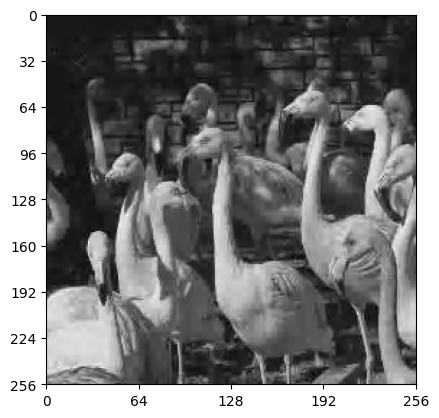

In [10]:
N = 4
M = 16
fdq = True

step = (minimize_scalar(objective_function_lbt2, bounds=(0, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt2(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt2(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [11]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

10.76495657023844 0.8541404356230566 0.4561390481480374


Forward 4 x 4 LBT
Second 4 x 4 LBT on low-pass image
Quantising to step size of 45.78660263481169
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39536
Bits for huffman table = 1424
40960
Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 45.78660263481169
Inverting second 4 x 4 LBT
Inverse 4 x 4 LBT



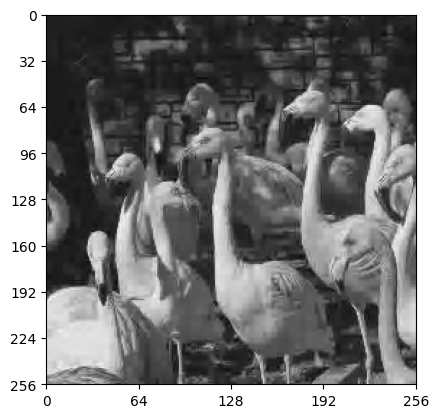

In [12]:
N = 4
M = 16
fdq = False

step = (minimize_scalar(objective_function_lbt2, bounds=(1, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt2(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt2(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [13]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

10.726499459754223 0.8541915114312192 0.46064314732064826


In [14]:
from cued_sf2_lab.jpeg_lbt_dwt import jpegenc_lbt_dwt, jpegdec_lbt_dwt, objective_function_lbt2

Forward 4 x 4 LBT
Second 2-level DWT on low-pass image
Performing frequency dependent quantization with overall step size of 28.268475105643322
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 39530
Bits for huffman table = 1424
40954
Generating huffcode and ehuf using custom tables
Decoding rows
Regrouping quantized image
De-quantizing frequency dependent with overall step size of 28.268475105643322
Inverting second 2-level DWT on low-pass image
Inverting 4 x 4 LBT


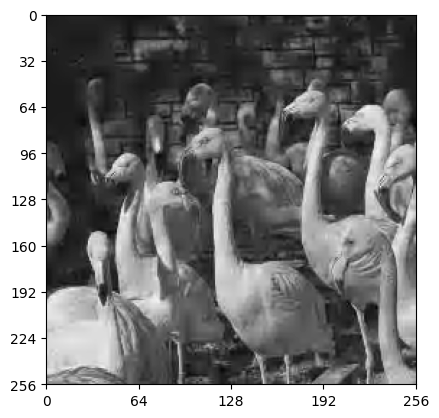

In [15]:
N = 4
M = 16
fdq = True

step = (minimize_scalar(objective_function_lbt2, bounds=(0, 100), args=(image, target_bits, fdq, N, M, True), method='bounded')).x

vlc, hufftab, totalbits = jpegenc_lbt_dwt(image, step, fdq, N, M, opthuff=True)
print(totalbits)
Z = jpegdec_lbt_dwt(vlc, step, fdq, N, M, hufftab=hufftab)
fig, ax = plt.subplots()
plot_image(Z, ax=ax);

In [16]:
rmse = np.std(Z-image)
ssim = ssim_comp(Z, image, data_range=256)
vif = vif_index(Z, image)
print(rmse, ssim, vif)

13.524166611121146 0.7713384046731421 0.3594370512870958
